<a href="https://colab.research.google.com/github/jacosta387/cd_202202_jose_acosta/blob/main/Taller_1%2C2%2C3_DF_Dengue2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

#function_number = 1 #Even, Triangular, Gaussian, Epa, Variance
#bandwith = 100
#resolution = 10
#interval = ceil(bandwith/resolution)

In [3]:
pip install pyproj

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.3 MB 14.1 MB/s 


In [4]:
# Librerias a importar.
import pandas as pd
import numpy as np
import math

Revisar que no se UTF-8

In [5]:
# Importacion del dataframe
ruta = "https://foscalinternacional.com/datasets/eventos_dengue_2020.csv"
df = pd.read_csv(ruta)

In [6]:
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,2,2,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2,2,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000


Page WEB -thetrusizeof

In [7]:
df.dtypes # types of variables

ID                     int64
fec_not               object
semana                 int64
año                    int64
edad_                  int64
uni_med_               int64
sexo_                 object
cod_pais_o             int64
cod_dpto_o             int64
cod_mun_o              int64
area_                  int64
ocupacion_             int64
tip_ss_               object
cod_ase_              object
gp_discapa             int64
gp_desplaz             int64
gp_migrant             int64
gp_carcela             int64
gp_gestan              int64
gp_calle               int64
gp_psiquia             int64
gp_vic_vio             int64
fecha_contagio        object
inicio_sintomas       object
pac_hos_               int64
fec_hos_              object
condicion_final        int64
fecha_defuncion      float64
fecha_nacimiento      object
certif_defuncion     float64
familiar_sintomas      int64
fiebre                 int64
cefalea                int64
dolor_retroocular      int64
mialgias      

Activity 1 - Convertir formato fecha en el dataframe

In [8]:
df['fec_not_2'] = pd.to_datetime(df['fec_not'], format="%d/%m/%Y")
df['fecha_contagio2'] = pd.to_datetime(df['fecha_contagio'], format="%d/%m/%Y")
df['fec_hos_2'] = pd.to_datetime(df['fec_hos_'], format="%d/%m/%Y")
df['inicio_sintomas2'] = pd.to_datetime(df['fecha_contagio'], format="%d/%m/%Y")
df.head(5)

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud,fec_not_2,fecha_contagio2,fec_hos_2,inicio_sintomas2
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,1. Ambulatorio,7.076011,-73.102501,2020-01-17,2020-01-17,NaT,2020-01-17
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,1. Ambulatorio,7.079495,-73.105400,2020-01-10,2020-01-10,NaT,2020-01-10
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,1. Ambulatorio,7.090290,-73.091003,2020-01-12,2020-01-12,NaT,2020-01-12
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,1. Ambulatorio,7.067435,-73.090958,2020-01-12,2020-01-10,NaT,2020-01-10
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980,2020-01-10,2020-01-10,2020-01-10,2020-01-10


In [9]:
#Creación de la proyección.
import pyproj

P= pyproj.Proj(proj='utm', zone=18, ellps= 'WGS84', preserve_units=True)

In [10]:
# Se convertiran las coordenadas geográficas a UTM - x and y
df['x'], df['y'] = P(df['longitud'], df['latitud'])
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,aum_hematocrito,conducta,latitud,longitud,fec_not_2,fecha_contagio2,fec_hos_2,inicio_sintomas2,x,y
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,1. Ambulatorio,7.076011,-73.102501,2020-01-17,2020-01-17,NaT,2020-01-17,709584.027559,782579.281866
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,1. Ambulatorio,7.079495,-73.105400,2020-01-10,2020-01-10,NaT,2020-01-10,709262.121378,782963.354103
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,1. Ambulatorio,7.090290,-73.091003,2020-01-12,2020-01-12,NaT,2020-01-12,710847.924654,784163.825097
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,1. Ambulatorio,7.067435,-73.090958,2020-01-12,2020-01-10,NaT,2020-01-10,710863.366771,781635.895608
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2. Hospitalizacion piso,7.066905,-73.104980,2020-01-10,2020-01-10,2020-01-10,2020-01-10,709314.159319,781570.969374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,2,1. Ambulatorio,7.072610,-73.099487,2020-03-07,2020-03-06,NaT,2020-03-06,709918.546763,782204.438977
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,1,2. Hospitalizacion piso,7.065252,-73.103607,2020-03-13,2020-03-13,2020-03-13,2020-03-13,709466.644754,781388.734012
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,1. Ambulatorio,7.091391,-73.103264,2020-03-08,2020-03-08,NaT,2020-03-08,709492.782783,784279.996264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,1. Ambulatorio,7.061083,-73.097000,2020-03-11,2020-03-11,NaT,2020-03-11,710198.574916,780930.648555


Actividad 2 - Agregar una fila en el dataframe que nos indique la distancia que se encuentra de la alcaldia de Floridablanca hasta cada punto.

In [11]:
#Punto de Alcaldia.
import numpy as np

def distancia():
  lat_alcaldia = 7.062958503050063
  lon_alcaldia = -73.08619741888012

  

  x_alcaldia, y_alcaldia = P(lat_alcaldia, lon_alcaldia)

  df['distancia'] = np.sqrt((x_alcaldia-df['x'])**2 + (y_alcaldia-df['y'])**2)


In [12]:
distancia()

In [13]:
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,conducta,latitud,longitud,fec_not_2,fecha_contagio2,fec_hos_2,inicio_sintomas2,x,y,distancia
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,1. Ambulatorio,7.076011,-73.102501,2020-01-17,2020-01-17,NaT,2020-01-17,709584.027559,782579.281866,1.064666e+07
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,1. Ambulatorio,7.079495,-73.105400,2020-01-10,2020-01-10,NaT,2020-01-10,709262.121378,782963.354103,1.064709e+07
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,1. Ambulatorio,7.090290,-73.091003,2020-01-12,2020-01-12,NaT,2020-01-12,710847.924654,784163.825097,1.064802e+07
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,1. Ambulatorio,7.067435,-73.090958,2020-01-12,2020-01-10,NaT,2020-01-10,710863.366771,781635.895608,1.064552e+07
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2. Hospitalizacion piso,7.066905,-73.104980,2020-01-10,2020-01-10,2020-01-10,2020-01-10,709314.159319,781570.969374,1.064570e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,1. Ambulatorio,7.072610,-73.099487,2020-03-07,2020-03-06,NaT,2020-03-06,709918.546763,782204.438977,1.064623e+07
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2. Hospitalizacion piso,7.065252,-73.103607,2020-03-13,2020-03-13,2020-03-13,2020-03-13,709466.644754,781388.734012,1.064550e+07
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,1. Ambulatorio,7.091391,-73.103264,2020-03-08,2020-03-08,NaT,2020-03-08,709492.782783,784279.996264,1.064835e+07
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,1. Ambulatorio,7.061083,-73.097000,2020-03-11,2020-03-11,NaT,2020-03-11,710198.574916,780930.648555,1.064493e+07


In [14]:
datosf = df
datosf = datosf.select_dtypes(exclude=['object','datetime64'])
datosf = datosf.drop('año',axis = 1)
datosf = datosf.drop('cod_pais_o', axis = 1)
datosf = datosf.drop('condicion_final', axis = 1)
datosf = datosf.drop('fecha_defuncion', axis = 1)
datosf = datosf.drop('certif_defuncion', axis = 1)


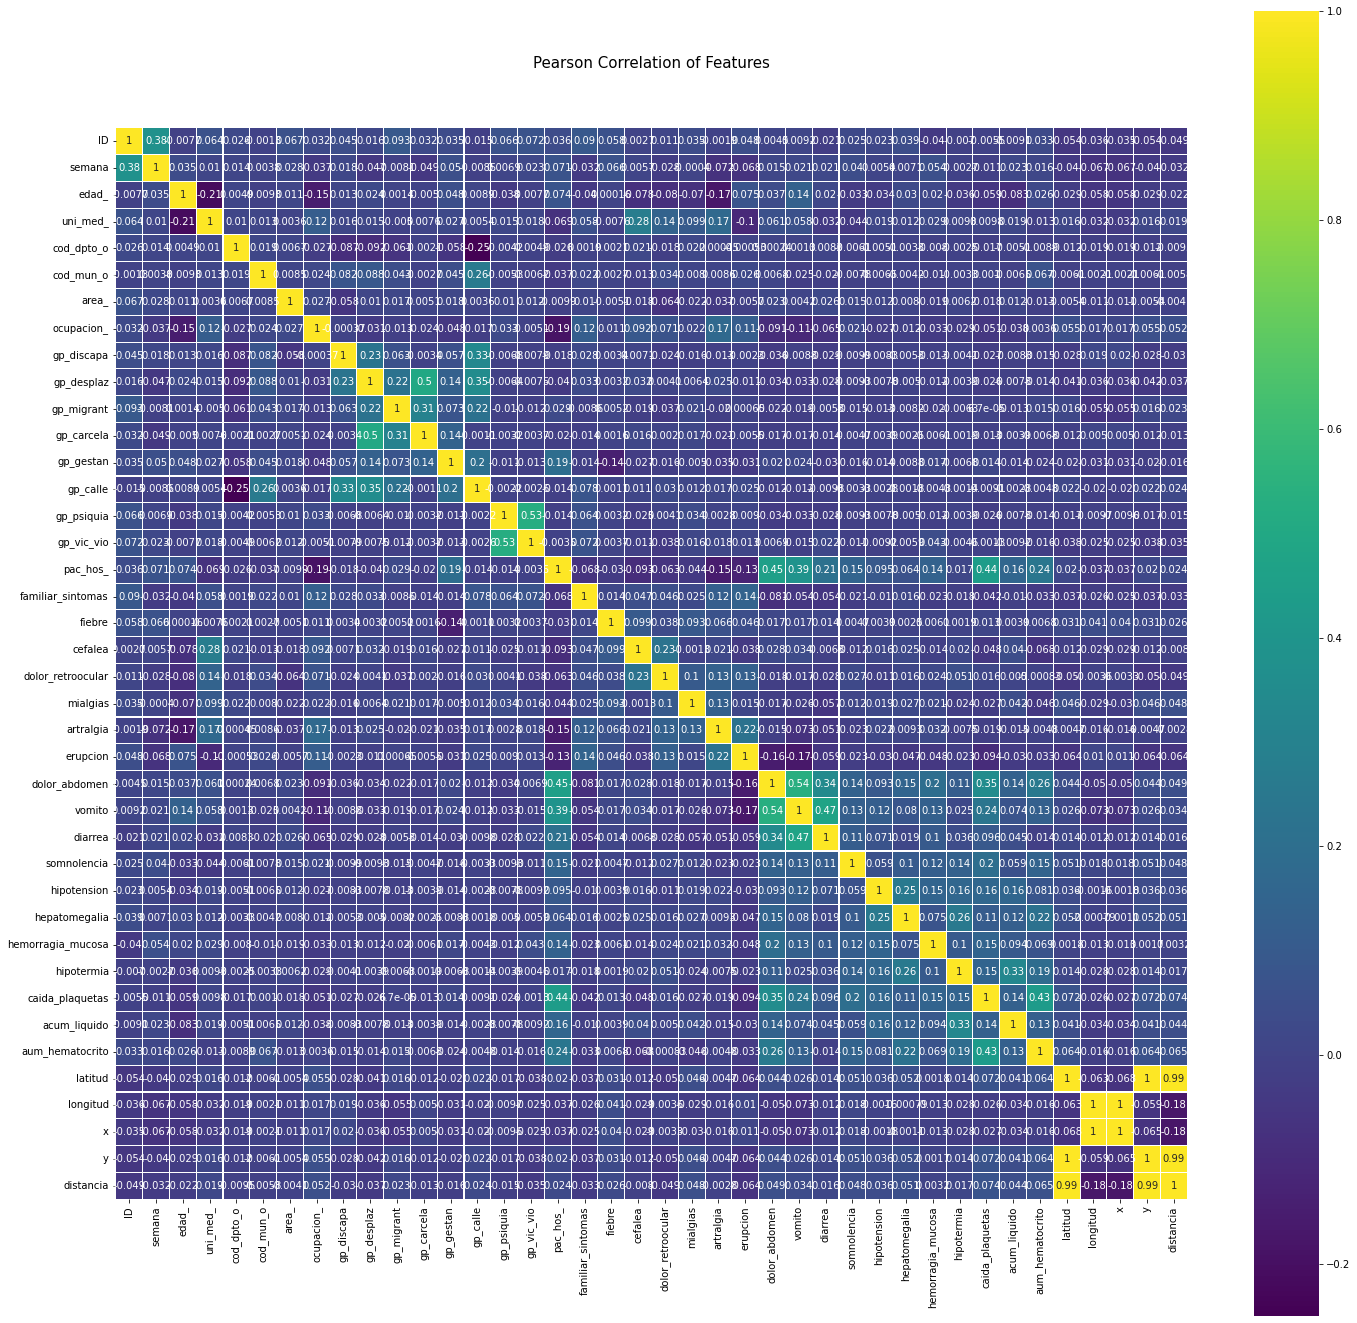

In [15]:
import matplotlib.pyplot as plt
import seaborn as sb

colormap = plt.cm.viridis
plt.figure(figsize=(24,24))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sb.heatmap(datosf.astype(float).corr(),linewidth=0.1,vmax=1.0,square=True, cmap=colormap,linecolor='white', annot=True)



### Taller 2 Funciones de Densidad y Taller 3 Mapas de Calor

In [16]:
#1 Llenar matriz 400*400, llenarla de ceros


comp_X = df['x']
comp_y = df['y']

bandWidth = 100 #distancia minima requeridad entre datos
res = 10 

x_min=min(comp_X) - bandWidth
x_max=max(comp_X) + bandWidth
y_min=min(comp_y) - bandWidth
y_max=max(comp_y) + bandWidth

rows = math.ceil((y_max - y_min)/res)
collums = math.ceil((x_max - x_min)/res)

dataArr = np.zeros((rows, collums))

for i in range(len(comp_X)):
  x = comp_X[i]
  y = comp_y[i]

  row = math.floor((y-y_min)/res)
  collum = math.floor((x-x_min)/res)
  dataArr[row][collum] += 1

print(len(dataArr))
print(len(dataArr[0]))

475
458


In [17]:
#Funciones de Kernel

def kde_quartic(d,h):
    dn=d/h
    P=(15/16)*(1-dn**2)**2
    return P

def kde_epanechnikov(d,h):
    dn=d/h
    P=(3/4)*(1-dn**2)
    return P

def kde_gaussian(d,h):
    dn=d/h
    P=math.e**(-(dn**2)/2)/math.sqrt(2*math.pi)
    return P

def kde_varMin(d,h):
    dn=d/h
    P=3/8*(3-5*dn**2)
    return P

def kde_uniform():
  return 0.5


def kde_triangular(d,h):
  dn = d/h
  return 1-abs(dn)


  #Selector de función de kernel usando condicionales.
def kernel_selection(kernel_function, d, bw):
  kernel = 0
  if (kernel_function == 1):
    kernel = kde_quartic(d, bw)
  elif (kernel_function == 2):
    kernel = kde_epanechnikov(d,bw)
  elif (kernel_function == 3):
    kernel = kde_gaussian(d, bw)
  elif (kernel_function == 4):
    kernel = kde_varMin(d, bw)
  elif (kernel_function == 5):
    kernel = kde_uniform()
  elif (kernel_function == 6):
    kernel = kde_triangular(d, bw)
  return kernel


In [18]:
#Importar Librerias para vistas de mapas de calor.

import seaborn as sns
import matplotlib.pylab as plt
from matplotlib.pyplot import figure

## FUNTION KERNEL -> QUARTIC

Nota: Se presentara cada función de forma individual para una mejor comparación entre funciones.

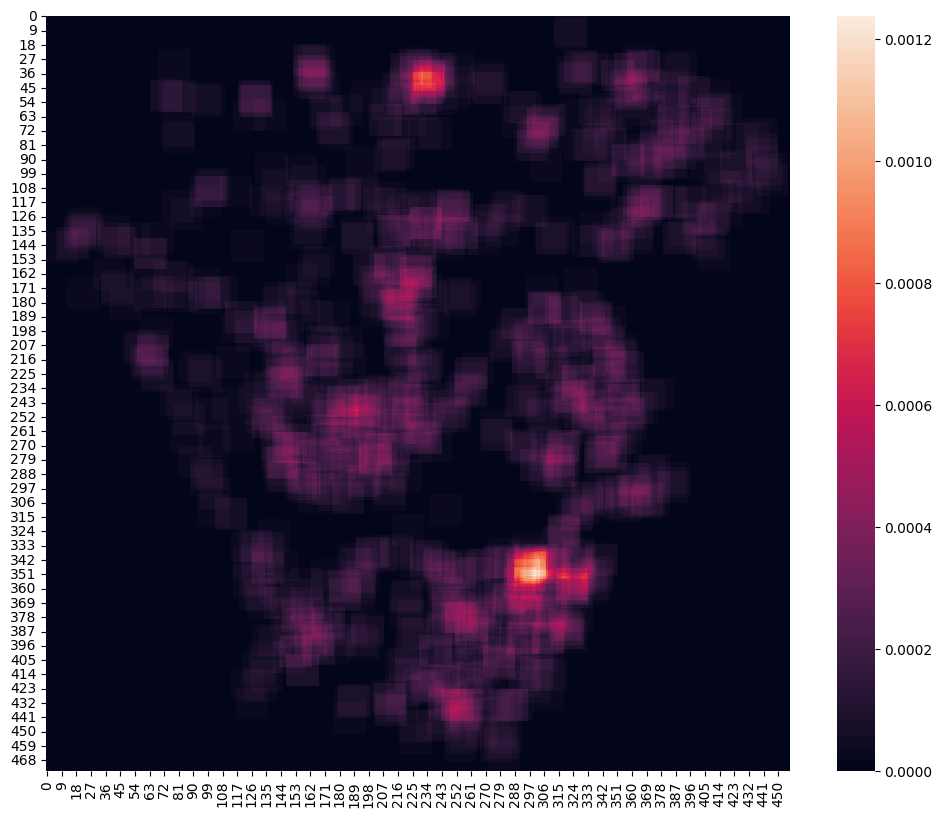

In [19]:
amap = np.zeros((rows, collums))
for i in range(0, len(dataArr)):
  for j in range(0, len(dataArr[i])):
    if (dataArr[i][j] != 0):
      for k in range(max(0, int(i-(bandWidth/res))), min(rows, int(i+(bandWidth/res)))):
        for l in range(max(0, int(j-(bandWidth/res))), min(collums, int(j+(bandWidth/res)))):
          d = math.sqrt((k-i)**2 + (l-j)**2)
          amap[k][l] += dataArr[i][j] * kernel_selection(1, d, bandWidth)/(math.pi*bandWidth**2)
figure(figsize=(12, 10), dpi=100)

ax = sns.heatmap(amap)

plt.show()

## FUNTION KERNEL -> EPANECHNIKOV
Nota: Se presentara cada función de forma individual para una mejor comparación entre funciones.

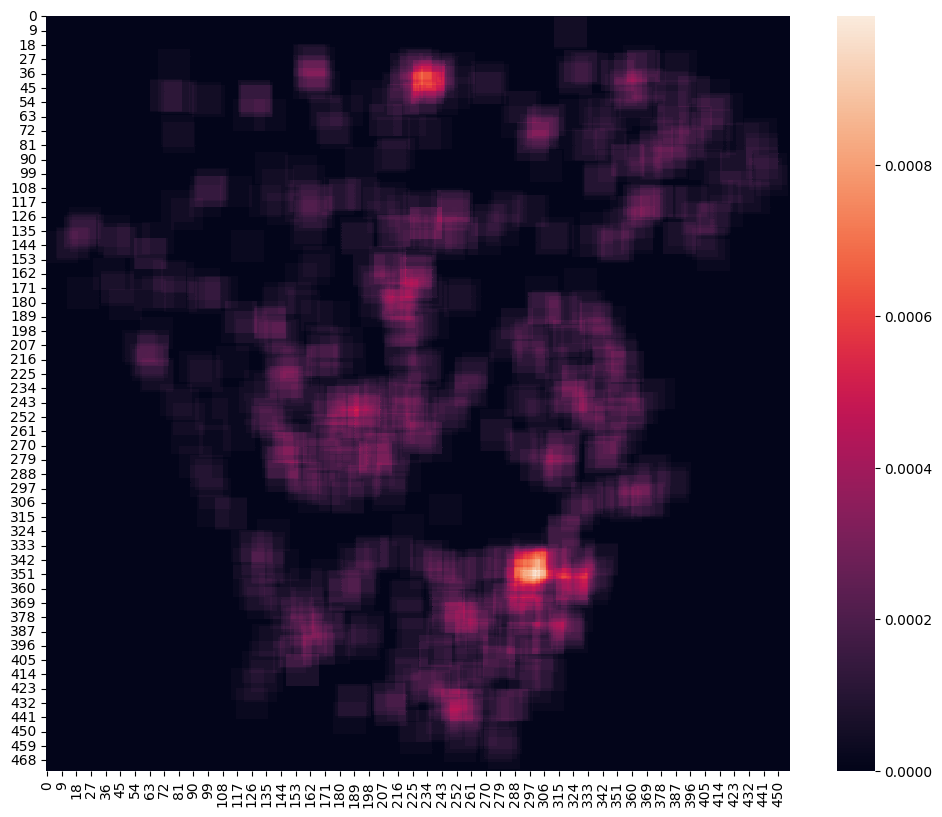

In [21]:
amap = np.zeros((rows, collums))
for i in range(0, len(dataArr)):
  for j in range(0, len(dataArr[i])):
    if (dataArr[i][j] != 0):
      for k in range(max(0, int(i-(bandWidth/res))), min(rows, int(i+(bandWidth/res)))):
        for l in range(max(0, int(j-(bandWidth/res))), min(collums, int(j+(bandWidth/res)))):
          d = math.sqrt((k-i)**2 + (l-j)**2)
          amap[k][l] += dataArr[i][j] * kernel_selection(2, d, bandWidth)/(math.pi*bandWidth**2)
figure(figsize=(12, 10), dpi=100)

ax = sns.heatmap(amap)

plt.show()

##FUNTION KERNEL -> GAUSSIANA
Nota: Se presentara cada función de forma individual para una mejor comparación entre funciones.

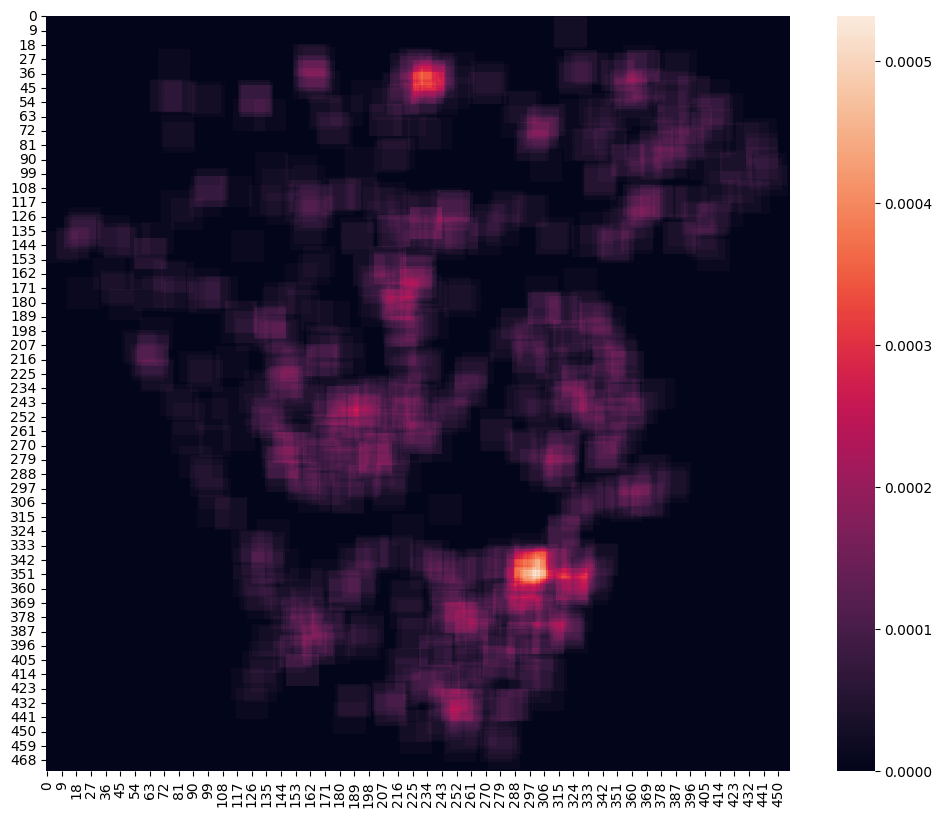

In [22]:
amap = np.zeros((rows, collums))
for i in range(0, len(dataArr)):
  for j in range(0, len(dataArr[i])):
    if (dataArr[i][j] != 0):
      for k in range(max(0, int(i-(bandWidth/res))), min(rows, int(i+(bandWidth/res)))):
        for l in range(max(0, int(j-(bandWidth/res))), min(collums, int(j+(bandWidth/res)))):
          d = math.sqrt((k-i)**2 + (l-j)**2)
          amap[k][l] += dataArr[i][j] * kernel_selection(3, d, bandWidth)/(math.pi*bandWidth**2)
figure(figsize=(12, 10), dpi=100)

ax = sns.heatmap(amap)

plt.show()

##FUNTION KERNEL -> VARIANZA MÍNIMA
Nota: Se presentara cada función de forma individual para una mejor comparación entre funciones.

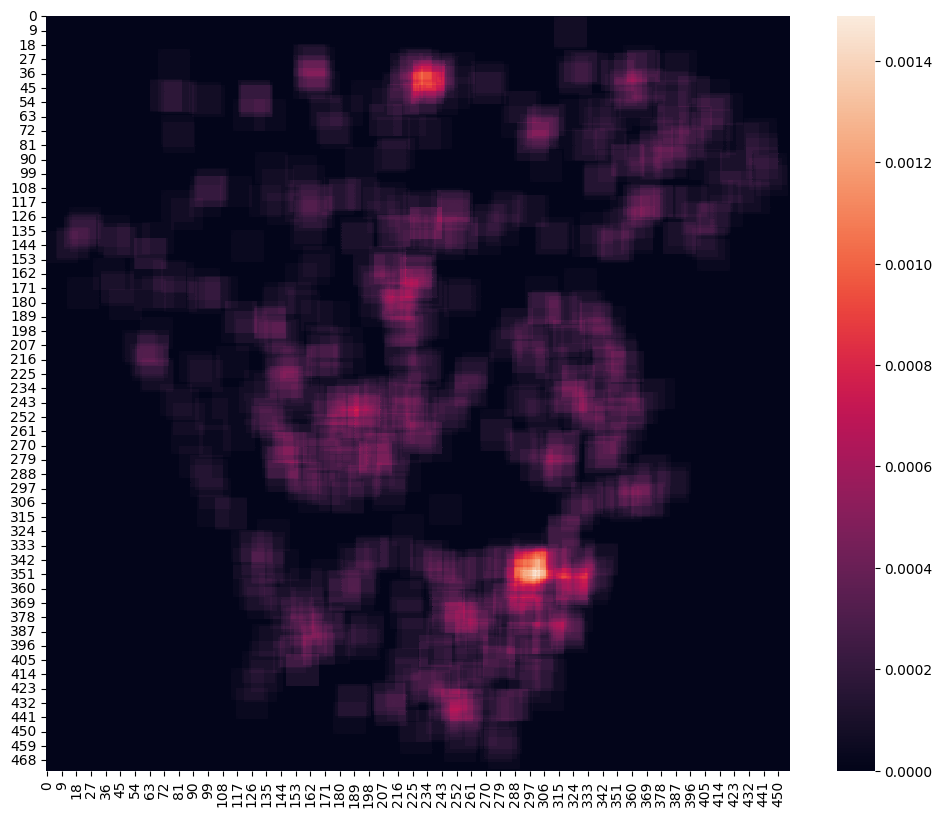

In [23]:
amap = np.zeros((rows, collums))
for i in range(0, len(dataArr)):
  for j in range(0, len(dataArr[i])):
    if (dataArr[i][j] != 0):
      for k in range(max(0, int(i-(bandWidth/res))), min(rows, int(i+(bandWidth/res)))):
        for l in range(max(0, int(j-(bandWidth/res))), min(collums, int(j+(bandWidth/res)))):
          d = math.sqrt((k-i)**2 + (l-j)**2)
          amap[k][l] += dataArr[i][j] * kernel_selection(4, d, bandWidth)/(math.pi*bandWidth**2)
figure(figsize=(12, 10), dpi=100)

ax = sns.heatmap(amap)

plt.show()

##FUNTION KERNEL -> UNIFORME
Nota: Se presentara cada función de forma individual para una mejor comparación entre funciones.

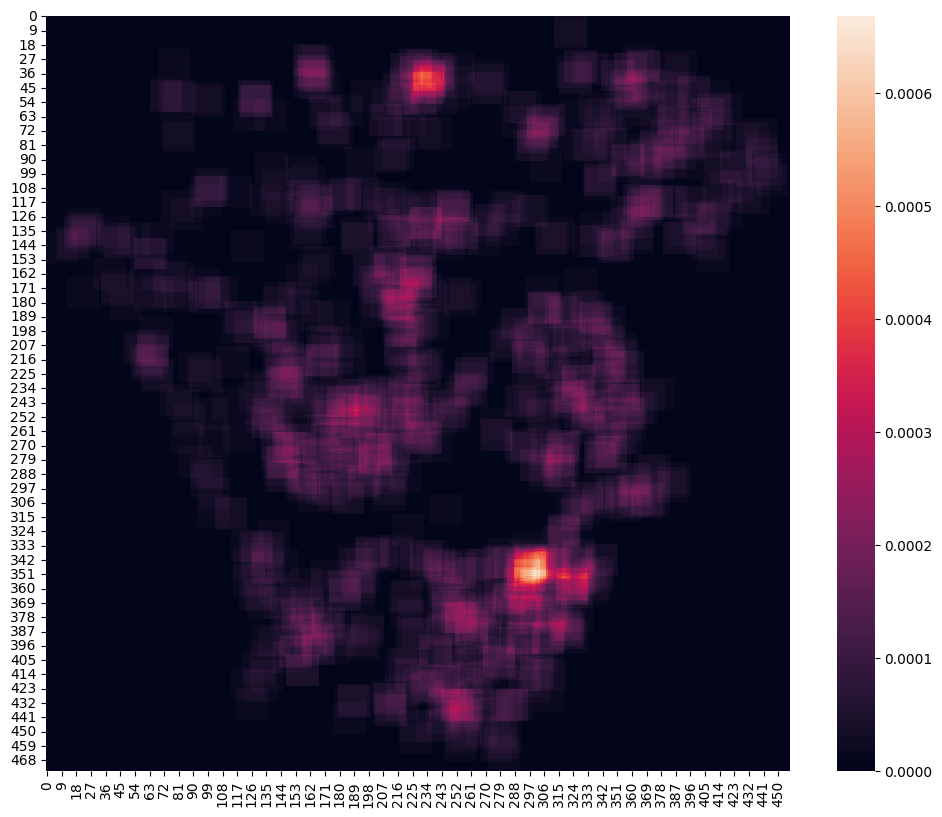

In [24]:
amap = np.zeros((rows, collums))
for i in range(0, len(dataArr)):
  for j in range(0, len(dataArr[i])):
    if (dataArr[i][j] != 0):
      for k in range(max(0, int(i-(bandWidth/res))), min(rows, int(i+(bandWidth/res)))):
        for l in range(max(0, int(j-(bandWidth/res))), min(collums, int(j+(bandWidth/res)))):
          d = math.sqrt((k-i)**2 + (l-j)**2)
          amap[k][l] += dataArr[i][j] * kernel_selection(5, d, bandWidth)/(math.pi*bandWidth**2)
figure(figsize=(12, 10), dpi=100)

ax = sns.heatmap(amap)

plt.show()

##FUNTION KERNEL -> TRIANGULAR
Nota: Se presentara cada función de forma individual para una mejor comparación entre funciones.

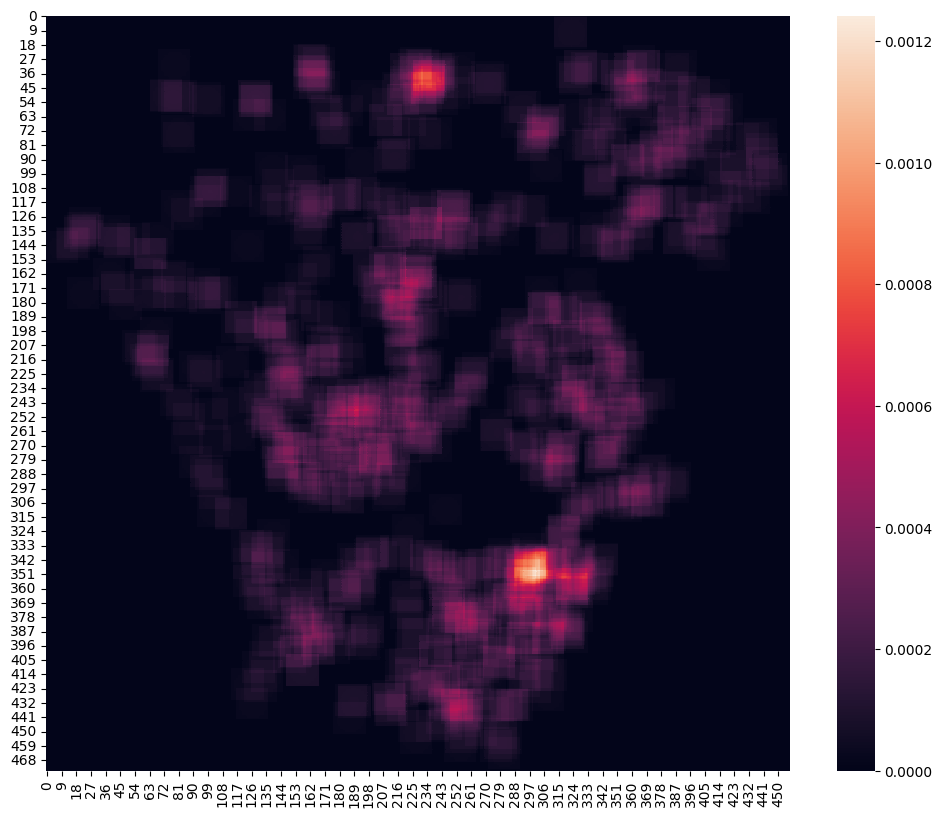

In [25]:
amap = np.zeros((rows, collums))
for i in range(0, len(dataArr)):
  for j in range(0, len(dataArr[i])):
    if (dataArr[i][j] != 0):
      for k in range(max(0, int(i-(bandWidth/res))), min(rows, int(i+(bandWidth/res)))):
        for l in range(max(0, int(j-(bandWidth/res))), min(collums, int(j+(bandWidth/res)))):
          d = math.sqrt((k-i)**2 + (l-j)**2)
          amap[k][l] += dataArr[i][j] * kernel_selection(6, d, bandWidth)/(math.pi*bandWidth**2)
figure(figsize=(12, 10), dpi=100)

ax = sns.heatmap(amap)

plt.show()

**Conclusión:** Se puede observar que entre las funciones de Kernel uniforme, varianza minima, gaussiana, epanechnikov y quartic en forma comparativa la variación es poca, lo cual nos permite ver de forma visual la precisión de cada función.

Respecto a los mapas de calor se puede identificar que los puntos de mayor concentración posiblemente serian en los sectores del barrio La Cumbre y la parte norte del barrio El Reposo.